<h1>Zadanie<h1>

(255, 259, 4)


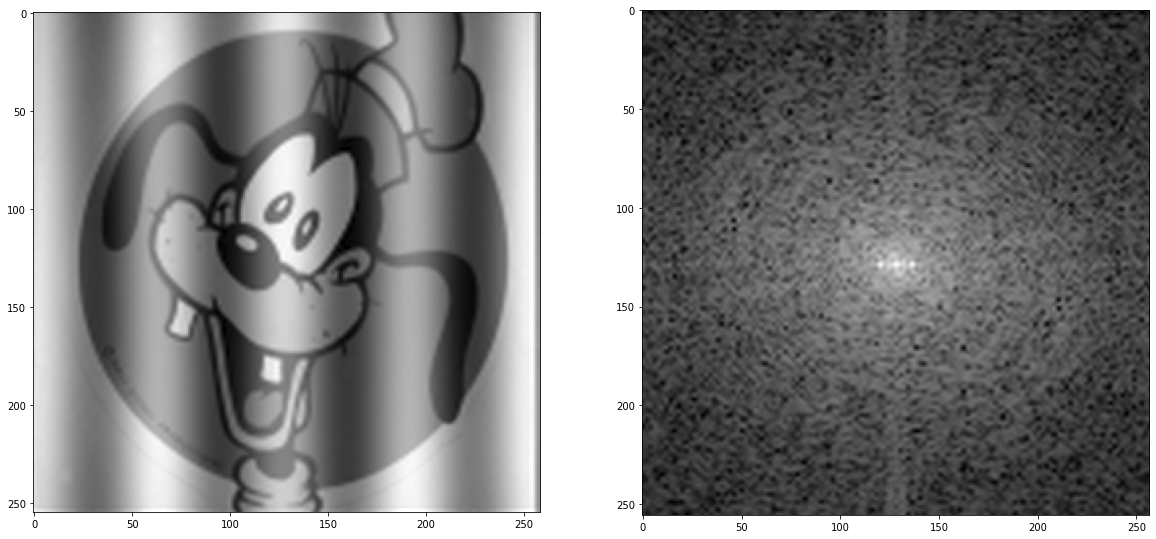

In [1]:
from skimage import io
import matplotlib.pyplot as plt

image = io.imread("pobrane.png")
transform_image = io.imread("pobrane (1).png")

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(image, cmap = 'gray')
axes[1].imshow(transform_image, cmap = 'gray')

print(image.shape)

C:\Users\MacTii\AppData\Local\Temp/ipykernel_20440/617685699.py:5: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))


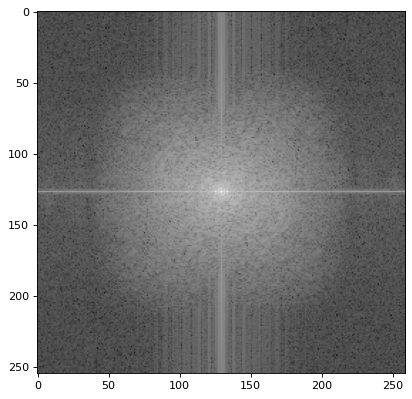

In [2]:
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap="gray")


C:\Users\MacTii\AppData\Local\Temp/ipykernel_20440/1477082295.py:22: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  axes[1].imshow(rgb2gray(image), cmap="gray")


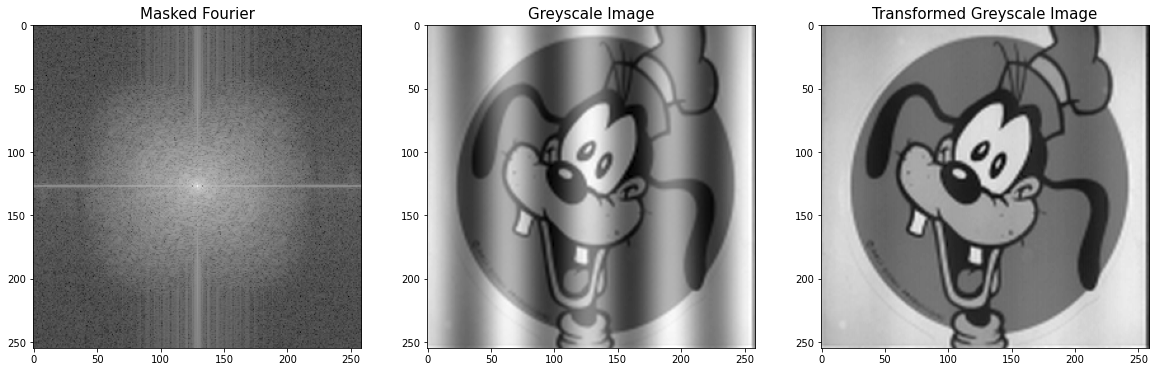

In [3]:
import numpy as np
from numpy.fft import ifft2, fftshift
from skimage.color import rgb2gray

def fourier_clean(image_fourier):
    f_size = 15
    max=9000
    min=8000
    result = np.copy(image_fourier)
    for i in range(image_fourier.shape[0]):
        for j in range(image_fourier.shape[1]):
            if np.abs(result[i, j]) >= min and np.abs(result[i, j]) < max:
                result[i, j] = 1

    fft_image = ifft2(fftshift(result))

    fig, axes = plt.subplots(1, 3, figsize=(20, 10))

    axes[0].imshow(np.log(np.abs(result)), cmap='gray')
    axes[0].set_title("Masked Fourier", fontsize=f_size)

    axes[1].imshow(rgb2gray(image), cmap="gray")
    axes[1].set_title("Greyscale Image", fontsize=f_size)

    axes[2].imshow(np.abs(fft_image), cmap='gray')
    axes[2].set_title("Transformed Greyscale Image", fontsize=f_size)

fourier_clean(dark_image_grey_fourier)